# Project: Investigate a Dataset ( No show Appoinment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project i will analyze No show Appoinment dataset

### Questions that will help to anayze the data set:
<ul>
<li><a href="#q1">How many of patients attends ?</a></li>
<li><a href="#q2">Does Gender effect on attending?</a></li>
<li><a href="#q3">Does Age effect on attending?</a></li>
<li><a href="#q4">Does Scholarship effect attending?</a></li>
<li><a href="#q4">Does receiving sms effects ?</a></li>
<li><a href="#q5">Does diseases effect attending?</a></li>
    <ul>
        <li><a href="#q6">Hipertension</a></li>
        <li><a href="#q7">Diabetes</a></li>
        <li><a href="#q8">Alcoholism</a></li>
        <li><a href="#q9">Handcap</a></li>
    </ul>
<li><a href="#q10">Does Neighbourhood effect attending?</a></li>
</ul>



In [73]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from datetime import datetime
import pprint
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, i will load in the data, check for cleanliness, and then trim and clean your dataset for analysis

### General Properties

In [74]:
# Load data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# print first three rows
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [75]:
## print tail of dataset
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [76]:
# Number of rows and columns
df.shape

(110527, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As showen AppointmentDay, ScheduledDay need to be dataTime instead of object

In [78]:
## Change AppointmentID, AppointmentDay to dateTime
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
## make sure that columns changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       


### Data Cleaning (Replace this with more specific notes!)

In [79]:
# Does dataset has duplicated values ?
df.duplicated().sum()

0

there is no duplication

In [80]:
# Does dataset has null values ?
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [81]:
# rename No-show to NoShow
df.rename(columns={'No-show':'NoShow'}, inplace=True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [82]:
# drop non needed columns
df.drop([ 'AppointmentDay', 'ScheduledDay','PatientId', 'AppointmentID' ], axis=1, inplace = True)
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [83]:
# it's no ordinary to have age less than 0
np.sort(df.Age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [84]:
# remove all less than Zero
df = df[df.Age >= 0]
    
df.shape

(110526, 10)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### How many patients attends ?

In [85]:
# i will use it more than once so i've create function
def countValue(column):
    print(df[column].value_counts())

#count Values in NoShow Column
countValue('NoShow')

No     88207
Yes    22319
Name: NoShow, dtype: int64


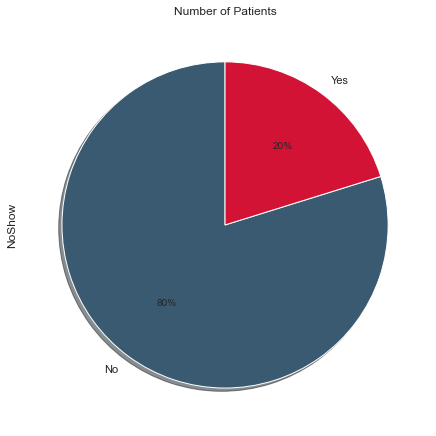

In [86]:
# pie chart
pie_colors = ['#3a5a71', '#d31336']
df['NoShow'].value_counts().plot.pie(figsize=(7.5 , 7.5), autopct='%1.0f%%',
                                 shadow = True, colors = pie_colors, startangle=90);
plt.title("Number of Patients");

In [87]:
def calculate_percent(number):
    result = (number / len(df)) * 100
    return result

print("Attend percentage: " + str(round(calculate_percent(88207), 2)))
print("Absent percentage: " + str(round(calculate_percent(22319), 2)))

Attend percentage: 79.81
Absent percentage: 20.19


As shown the attends 80% of total patients

<a id='q2'></a>
### Does Gender effect on attending?


In [88]:
# total count of gender
countValue('Gender')

F    71839
M    38687
Name: Gender, dtype: int64


In [89]:
print(df.Gender[df.NoShow == 'No'].value_counts())
print(df.Gender[df.NoShow == 'Yes'].value_counts())

F    57245
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


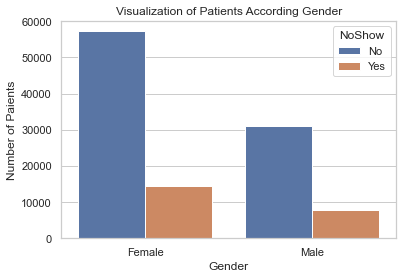

In [90]:
sns.set_theme(style="whitegrid")
visual = sns.countplot(x= df.Gender, hue= df.NoShow, data=df)
visual.set_title("Visualization of Patients According Gender")
visual.set_xticklabels(['Female', 'Male'])
plt.ylabel("Number of Paients");

<a id='q3'></a>
### Does Age affect on attendance?

Text(0.5, 1.0, 'Visualization of Patients According Age')

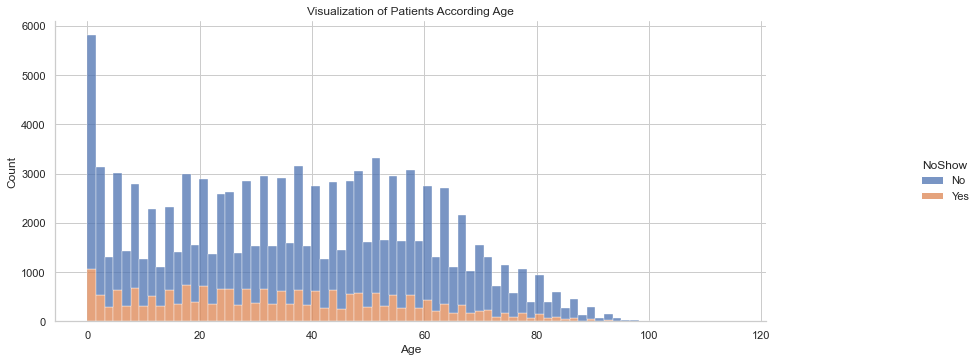

In [91]:
sns.set_theme(style="whitegrid")
visual = sns.displot(x= df.Age, hue= df.NoShow, data=df, multiple='stack')
visual.fig.set_size_inches(15,5)
plt.title("Visualization of Patients According Age")


In [92]:
print("Average Ages of Patients: " + str(round(df.Age.mean())) + " Year")
print("Median Ages of Patients: " + str(round(df.Age.median())) + " Year")
print("Max Age of Patients: " + str(df.Age.max()) +" Year")

Average Ages of Patients: 37 Year
Median Ages of Patients: 37 Year
Max Age of Patients: 115 Year


<a id='q4'></a>
### Does Scholarship effect attending?

Text(0.5, 1.0, 'Visualization of Patients According Scholarship')

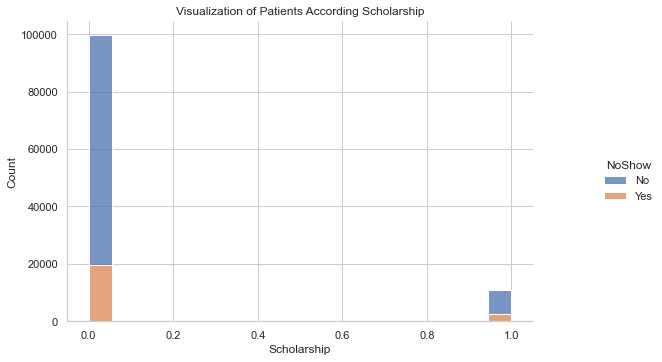

In [93]:
sns.set_theme(style="whitegrid")
visual = sns.displot(x= df.Scholarship, hue= df.NoShow, data=df, multiple='stack')
visual.fig.set_size_inches(10,5)
plt.title("Visualization of Patients According Scholarship")


In [94]:
print(df.Scholarship[df.NoShow == 'No'].value_counts())
print(df.Scholarship[df.NoShow == 'Yes'].value_counts())

0    79924
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


As showen the attending more than Scholarship members

<a id='q5'></a>
### Does receiving sms effects ?

Text(0.5, 1.0, 'Visualization of Patients According SMS')

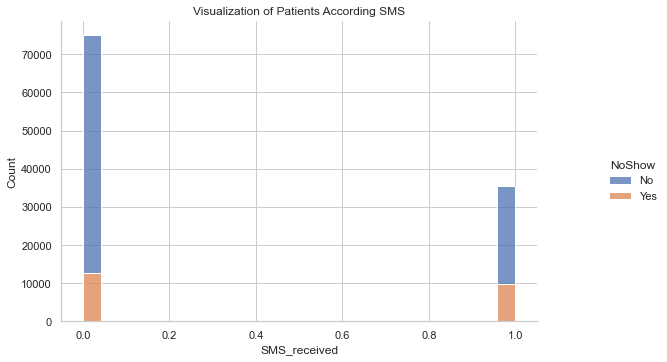

In [95]:
sns.set_theme(style="whitegrid")
visual = sns.displot(x= df.SMS_received, hue= df.NoShow, data=df, multiple='stack')
visual.fig.set_size_inches(10,5)
plt.title("Visualization of Patients According SMS")


In [96]:
print(df.SMS_received[df.NoShow == 'No'].value_counts())
print(df.SMS_received[df.NoShow == 'Yes'].value_counts())

0    62509
1    25698
Name: SMS_received, dtype: int64
0    12535
1     9784
Name: SMS_received, dtype: int64


As showen the attending more than numbers of SMS message sending

<a id='q6'></a>
## Does diseases effect attending?

<a id='q6'></a>
### Hipertension

Text(0.5, 1.0, 'Visualization of Patients According Hipertension')

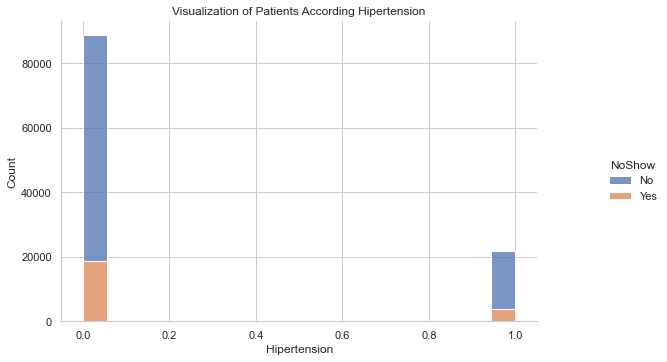

In [97]:
sns.set_theme(style="whitegrid")
visual = sns.displot(x= df.Hipertension, hue= df.NoShow, data=df, multiple='stack')
visual.fig.set_size_inches(10,5)
plt.title("Visualization of Patients According Hipertension")


As showen the there is no relation between Hipertension and attending

<a id='q7'></a>
### Diabetes

Text(0.5, 1.0, 'Visualization of Patients According Diabetes')

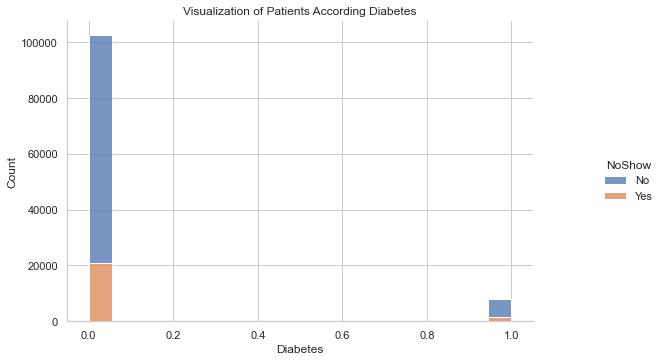

In [98]:
sns.set_theme(style="whitegrid")
visual = sns.displot(x= df.Diabetes, hue= df.NoShow, data=df, multiple='stack')
visual.fig.set_size_inches(10,5)
plt.title("Visualization of Patients According Diabetes")


As showen the there is no relation between Diabetes and attending

<a id='q8'></a>
### Alcoholism

Text(0.5, 1.0, 'Visualization of Patients According Alcoholism')

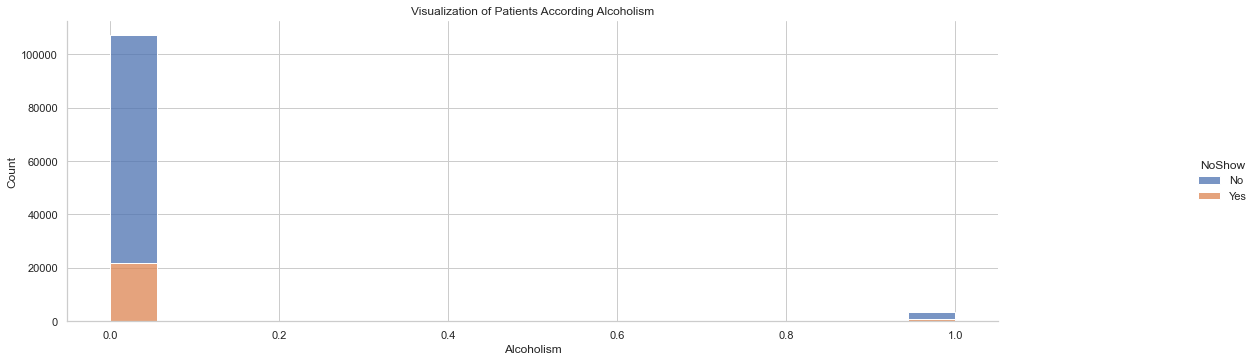

In [99]:
sns.set_theme(style="whitegrid")
visual = sns.displot(x= df.Alcoholism, hue= df.NoShow, data=df, multiple='stack')
visual.fig.set_size_inches(20,5)
plt.title("Visualization of Patients According Alcoholism")

As showen the there is no relation between Alcoholism and attending

<a id='q9'></a>
### Handcap

Text(0.5, 1.0, 'Visualization of Patients According Handcap')

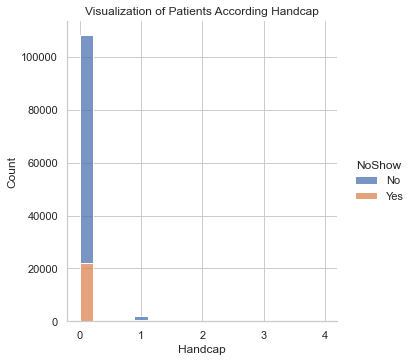

In [100]:
sns.set_theme(style="whitegrid")
visual = sns.displot(x= df.Handcap, hue= df.NoShow, data=df, multiple='stack')
plt.title("Visualization of Patients According Handcap")


<a id='q10'></a>
### Does Neighbourhood effect attending?

Text(0.5, 1.0, 'Visualization of Patients According Neighbourhood')

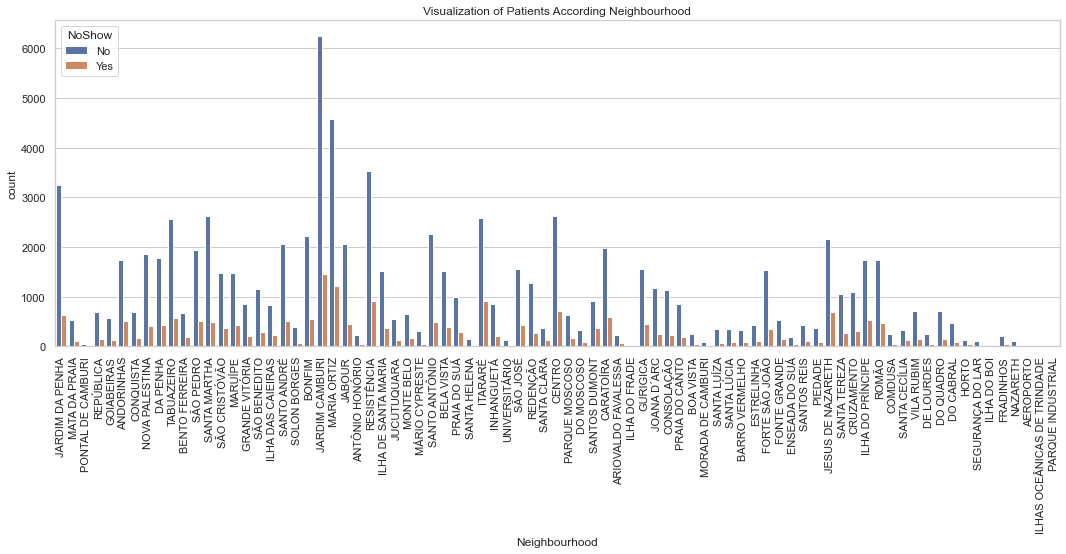

In [101]:
sns.set_theme(style="whitegrid")
plt.figure(figsize= (18,6))
visual = sns.countplot(x= df.Neighbourhood, hue= df.NoShow)
plt.xticks(rotation= 90)
plt.title("Visualization of Patients According Neighbourhood")


As shown Neighbourhood has effects on Patients attending

<a id='conclusions'></a>
## Conclusions

<ul>
<li>The average and the median of age are 37 years </li>
<li>The Age is until 60 years has most attending</li>
<li>A lot of attending was without any SMS</li>
<li>The neighbouthood is the most attending</li>
</ul>

### Limitations

<ul>
<li>Cannot find strong corrolation among with some entires like [ diseases or gender ] </li>
</ul>